# Fruit Classification


In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from glob import glob
from keras.layers.normalization import BatchNormalization

%tensorflow_version 1.x

import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

from tqdm import tqdm
import numpy as np
import os
from random import shuffle
import cv2



TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
fruit_file="/content/drive/My Drive/Colab Notebooks/fruits-360.zip"

In [ ]:
import zipfile
with zipfile.ZipFile(fruit_file,'r') as z:
  z.extractall()

In [ ]:
train_path = "fruits-360/Training/"
test_path = "fruits-360/Test/"

(-0.5, 99.5, 99.5, -0.5)

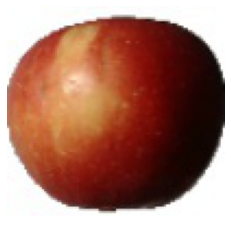

In [ ]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")

In [ ]:
x=img_to_array(img)
print(x.shape)

(100, 100, 3)


In [ ]:
className=glob(train_path +'/*')
className

['fruits-360/Training/Nectarine',
 'fruits-360/Training/Mango Red',
 'fruits-360/Training/Tomato not Ripened',
 'fruits-360/Training/Apple Granny Smith',
 'fruits-360/Training/Pear Monster',
 'fruits-360/Training/Apple Golden 1',
 'fruits-360/Training/Apple Red 2',
 'fruits-360/Training/Potato Sweet',
 'fruits-360/Training/Grapefruit White',
 'fruits-360/Training/Fig',
 'fruits-360/Training/Tomato 2',
 'fruits-360/Training/Pepper Orange',
 'fruits-360/Training/Tomato Heart',
 'fruits-360/Training/Apple Red 1',
 'fruits-360/Training/Avocado',
 'fruits-360/Training/Huckleberry',
 'fruits-360/Training/Pepino',
 'fruits-360/Training/Carambula',
 'fruits-360/Training/Apple Red 3',
 'fruits-360/Training/Plum 3',
 'fruits-360/Training/Grape White 4',
 'fruits-360/Training/Cantaloupe 1',
 'fruits-360/Training/Mulberry',
 'fruits-360/Training/Redcurrant',
 'fruits-360/Training/Salak',
 'fruits-360/Training/Apple Golden 3',
 'fruits-360/Training/Apple Crimson Snow',
 'fruits-360/Training/Nut For

In [ ]:
numberOfClass = len(className)
print("number Of Class: ",numberOfClass)

number Of Class:  131


In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))
model.add(Activation("softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=['accuracy'])

In [ ]:
batch_size=32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.3,
                                   horizontal_flip=True,
                                   zoom_range=0.3)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size=x.shape[:2],
                                                   batch_size=batch_size,
                                                   color_mode="rgb",
                                                   class_mode="categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                 target_size=x.shape[:2],
                                                 batch_size=batch_size,
                                                 color_mode="rgb",
                                                 class_mode="categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
hist=model.fit_generator(
generator=train_generator,
steps_per_epoch=1600 // batch_size,
epochs=20,
validation_data=test_generator,
validation_steps=800//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
50/50 [==============================] - 4s 85ms/step - loss: 4.8304 - accuracy: 0.0231 - val_loss: 4.3364 - val_accuracy: 0.0737
Epoch 2/20
50/50 [==============================] - 4s 83ms/step - loss: 4.0346 - accuracy: 0.0913 - val_loss: 3.3032 - val_accuracy: 0.1700
Epoch 3/20
50/50 [==============================] - 4s 84ms/step - loss: 3.3002 - accuracy: 0.1825 - val_loss: 2.5048 - val_accuracy: 0.3700
Epoch 4/20
50/50 [==============================] - 4s 84ms/step - loss: 2.7329 - accuracy: 0.2675 - val_loss: 1.8898 - val_accuracy: 0.5175
Epoch 5/20
50/50 [==============================] - 4s 82ms/step - loss: 2.2914 - accuracy: 0.3500 - val_loss: 1.6123 - val_accuracy: 0.5800
Epoch 6/20
50/50 [==============================] - 4s 84ms/step - loss: 1.8930 - accuracy: 0.4387 - val_loss: 1.3227 - val_accuracy: 0.6250
Epoch 7/20
50/50 [==============================] - 4s 84ms/step - loss: 1.601

In [ ]:
model.save_weights("codequest_project_weights.h5")

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

In [ ]:
from sklearn.datasets import load_files
import numpy as np

train_dir = "fruits-360/Training/"
test_dir = "fruits-360/Test/"

def load_dataset(path):
    data=load_files(path)
    files=np.array(data['filenames'])
    targets=np.array(data['target'])
    target_labels=np.array(data['target_names'])
    return files,targets,target_labels

x_train,y_train,target_labels=load_dataset(train_dir)
x_test,y_test,_=load_dataset(test_dir)
print('Loading complete')

print('Training set size : ',x_train.shape[0])
print('Testing set size: ',x_test.shape[0])

Loading complete
Training set size :  67692
Testing set size:  22688


In [ ]:
no_of_classes = len(np.unique(y_train))
no_of_classes

131

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [ ]:
from sklearn.model_selection import train_test_split
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.2,random_state=42)


In [ ]:
x_valid.shape,y_valid.shape

((4538,), (4538, 131))

In [ ]:
x_test.shape,y_test.shape

((18150,), (18150, 131))

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array,load_img
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train=np.array(convert_image_to_array(x_train))
print('Teaining set shape: ',x_train.shape)

x_valid= np.array(convert_image_to_array(x_valid))
print('validation set shape: ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape: ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Teaining set shape:  (67692, 100, 100, 3)
validation set shape:  (4538, 100, 100, 3)
Test set shape:  (18150, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [ ]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [ ]:
from keras.optimizers import Adamax
#from keras.callbacks import ModelCheckPoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(100,100,3),padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(131,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)       

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adamax',
             metrics=['accuracy'])

In [ ]:
learned_weights = ModelCheckpoint(filepath='codequest_project_weights.hdf5',verbose=1,save_best_only=True)
history=model.fit(x_train,y_train,
                 batch_size=50,
                 epochs=30,
                 validation_data=(x_valid,y_valid),
                 callbacks=[learned_weights],
                 verbose=2,shuffle=True)

Epoch 1/30

Epoch 00001: val_loss improved from inf to 0.28959, saving model to codequest_project_weights.hdf5
1354/1354 - 16s - loss: 1.2533 - accuracy: 0.6872 - val_loss: 0.2896 - val_accuracy: 0.9387
Epoch 2/30

Epoch 00002: val_loss improved from 0.28959 to 0.22051, saving model to codequest_project_weights.hdf5
1354/1354 - 15s - loss: 0.1494 - accuracy: 0.9530 - val_loss: 0.2205 - val_accuracy: 0.9579
Epoch 3/30

Epoch 00003: val_loss did not improve from 0.22051
1354/1354 - 15s - loss: 0.0633 - accuracy: 0.9803 - val_loss: 0.2313 - val_accuracy: 0.9628
Epoch 4/30

Epoch 00004: val_loss improved from 0.22051 to 0.20254, saving model to codequest_project_weights.hdf5
1354/1354 - 16s - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.2025 - val_accuracy: 0.9714
Epoch 5/30

Epoch 00005: val_loss did not improve from 0.20254
1354/1354 - 15s - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.2355 - val_accuracy: 0.9700
Epoch 6/30

Epoch 00006: val_loss improved from 0.20254 to 0.19904, savin

In [ ]:
model.load_weights('codequest_project_weights.hdf5')

In [ ]:
accuracy=model.evaluate(x_test,y_test,verbose=0)
print(accuracy[1])

0.9839669466018677


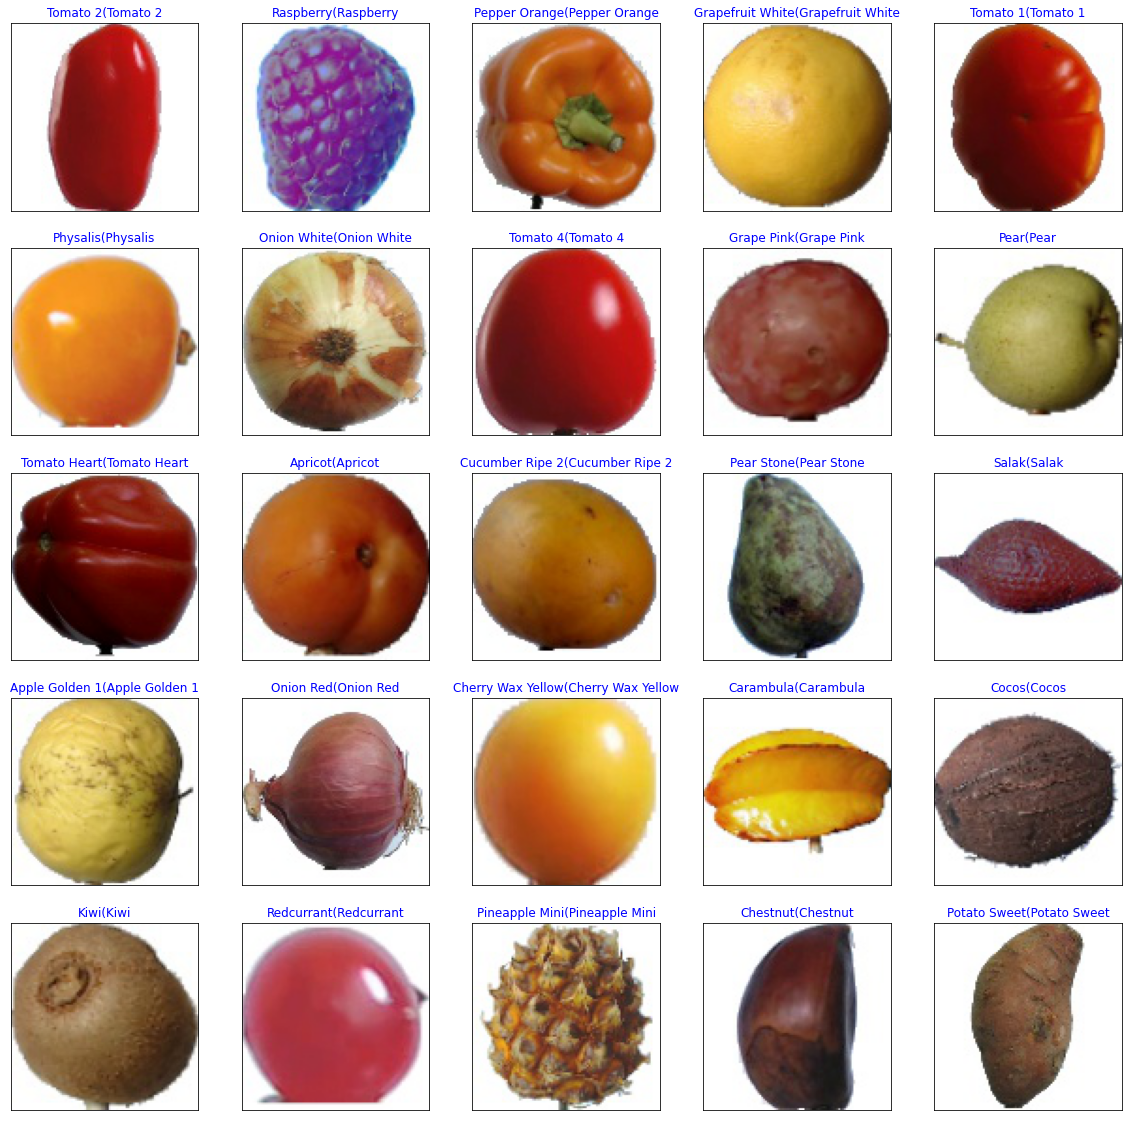

In [ ]:
y_pred = model.predict(x_test)

fig=plt.figure(figsize=(20,20))
for i,idx in enumerate(np.random.choice(x_test.shape[0],size=25,replace=False)):
    ax=fig.add_subplot(5,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx=np.argmax(y_pred[idx])
    true_idx=np.argmax(y_test[idx])
    ax.set_title("{}({}".format(target_labels[pred_idx],target_labels[true_idx]),
                color=("blue" if pred_idx == true_idx else "black"))